# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observations:

1. The Climate in the Southern Hemispheres appear not to be as harsh as the climate in the Northern Hemisphere on the same latitude looking at the maximum temperatures, cloudiness, humidity and wind speed.

2. We can also observe that the Latitude did not have a strong influence and correlation on the wind speed and cloudiness in both the southern and northern hemisphere because the strength of the correlation was very weak.

3. The highest temperature can be found at 0 latitude and the temperature drops at the increase or decrease of the latitude. However the temperature dips more(decreases) when the latitude increases.



In [76]:
# Dependencies and Setup
import os 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
# print(weather_api_key)

In [37]:
 # Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
print(weather_api_key)
# Build partial query URL
query_url = f"{base_url}APPID={weather_api_key}&units={units}&q="

 # Get weather data
weather_response = requests.get(query_url + city).json()
print(json.dumps(weather_response, indent=4))


e48190d89d62c2cdfcb0c9e10bc65ed2
{
    "coord": {
        "lon": -82.27,
        "lat": 40.82
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 38.82,
        "feels_like": 29.95,
        "temp_min": 37.4,
        "temp_max": 39.99,
        "pressure": 1017,
        "humidity": 100
    },
    "visibility": 10000,
    "wind": {
        "speed": 11.41,
        "deg": 310
    },
    "clouds": {
        "all": 75
    },
    "dt": 1604063242,
    "sys": {
        "type": 1,
        "id": 4873,
        "country": "US",
        "sunrise": 1604059066,
        "sunset": 1604096850
    },
    "timezone": -14400,
    "id": 5146062,
    "name": "Ashland",
    "cod": 200
}


In [38]:
print(requests.get(query_url + city).json())

{'coord': {'lon': -82.27, 'lat': 40.82}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 38.82, 'feels_like': 29.95, 'temp_min': 37.4, 'temp_max': 39.99, 'pressure': 1017, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1604063242, 'sys': {'type': 1, 'id': 4873, 'country': 'US', 'sunrise': 1604059066, 'sunset': 1604096850}, 'timezone': -14400, 'id': 5146062, 'name': 'Ashland', 'cod': 200}


In [39]:
# Set up Lists to hold response information
country = []
city_name = []
longitude = []
latitude = []
date = []
cloudiness = []
humidity = []
max_temperature = []
wind_speed = []

# Processing Record Counter Starting at 1
processing_record = 1

# print your starting log statement
print("Begining Data Retrieval \n-----------------------")
    
# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

    
# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        longitude.append(response["coord"]["lon"])
        latitude.append(response["coord"]["lat"])
        date.append(response["dt"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        max_temperature.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        

        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except: 
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")
 


Begining Data Retrieval 
-----------------------
City not found. Skipping...
Processing Record 1 | Bredasdorp
Processing Record 2 | New Norfolk
Processing Record 3 | Sambava
Processing Record 4 | Busselton
Processing Record 5 | Rikitea
Processing Record 6 | Berea
Processing Record 7 | Palmer
Processing Record 8 | Lagoa
City not found. Skipping...
Processing Record 9 | Clyde River
Processing Record 10 | Airai
Processing Record 11 | Ushuaia
Processing Record 12 | Quatre Cocos
Processing Record 13 | Mataura
City not found. Skipping...
Processing Record 14 | Pinawa
Processing Record 15 | São Filipe
Processing Record 16 | Talcahuano
Processing Record 17 | Moa
Processing Record 18 | Teya
Processing Record 19 | Hay River
Processing Record 20 | Leningradskiy
Processing Record 21 | Narsaq
Processing Record 22 | Yellowknife
Processing Record 23 | Diré
Processing Record 24 | Ilo
City not found. Skipping...
Processing Record 25 | Arlit
Processing Record 26 | Jamestown
Processing Record 27 | Alofi


Processing Record 226 | Banjar
Processing Record 227 | Crestview
Processing Record 228 | Balkanabat
Processing Record 229 | Sydney
Processing Record 230 | Nang Rong
Processing Record 231 | Dingle
Processing Record 232 | Codrington
Processing Record 233 | Bandarbeyla
Processing Record 234 | Arrondissement de Troyes
Processing Record 235 | Esperance
Processing Record 236 | Abay
Processing Record 237 | Sibu
Processing Record 238 | Tasiilaq
Processing Record 239 | Channel-Port aux Basques
Processing Record 240 | Tsimmerbude
Processing Record 241 | Westport
Processing Record 242 | San Patricio
Processing Record 243 | Caravelas
Processing Record 244 | Husavik
Processing Record 245 | Gisborne
Processing Record 246 | Katsuura
Processing Record 247 | Key Largo
Processing Record 248 | Rāvar
Processing Record 249 | Waddān
Processing Record 250 | Novaya Tavolzhanka
Processing Record 251 | Asău
City not found. Skipping...
Processing Record 252 | Vila Velha
Processing Record 253 | Leshukonskoye
Proc

Processing Record 453 | Yulara
Processing Record 454 | Yeppoon
Processing Record 455 | Novy Urengoy
Processing Record 456 | Mattru
Processing Record 457 | Deshnok
Processing Record 458 | Tabou
Processing Record 459 | Yumen
Processing Record 460 | Estrela
Processing Record 461 | Beringovskiy
Processing Record 462 | Novo Aripuanã
Processing Record 463 | Vila Franca do Campo
Processing Record 464 | Katobu
Processing Record 465 | Boa Vista
Processing Record 466 | Iberia
Processing Record 467 | Valparaíso
Processing Record 468 | Kyzyl-Suu
Processing Record 469 | Inhambane
Processing Record 470 | Vallenar
Processing Record 471 | Vardø
Processing Record 472 | Tommot
Processing Record 473 | Esim
Processing Record 474 | Sabzawār
Processing Record 475 | Praia da Vitória
Processing Record 476 | Keti Bandar
Processing Record 477 | Palāsbāri
Processing Record 478 | Sorong
Processing Record 479 | Cotonou
Processing Record 480 | Ahipara
Processing Record 481 | Ucluelet
Processing Record 482 | Wuwei
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
weather_lists ={"City": city_name, 
                "Lat": latitude,
                "Lng": longitude,
                "Max Temp": max_temperature,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speed,
                "Country": country,
                "Date": date
}

weather_data_df = pd.DataFrame(weather_lists)
weather_data_df.count()

City          528
Lat           528
Lng           528
Max Temp      528
Humidity      528
Cloudiness    528
Wind Speed    528
Country       528
Date          528
dtype: int64

In [41]:
# Show the dataframe
weather_data_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,66.20,42,0,11.41,ZA,1604063267
1,New Norfolk,-42.78,147.06,48.00,71,12,1.45,AU,1604063267
2,Sambava,-14.27,50.17,78.22,66,18,21.68,MG,1604063267
3,Busselton,-33.65,115.33,66.99,42,0,6.71,AU,1604063267
4,Rikitea,-23.12,-134.97,74.80,73,99,6.60,PF,1604063267


In [42]:
# Export & Save Data Into a .csv.
cities_list = zip(country, city_name,longitude,latitude,date,cloudiness,humidity,max_temperature)
# Set variable for output file
output_file = os.path.join('..', 'output_data', 'cities.csv')
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data_df.to_csv(output_file)
    

In [43]:
# Inspect the data and remove the cities where the humidity > 100%.

# Skip this step if there are no cities that have humidity > 100%.




In [74]:
#  Get the indices of cities that have humidity over 100%.
humidity_count = weather_data_df.loc[(weather_data_df["Humidity"] >= 101)]


humidity_count

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [46]:
# Make a dataframe that has only non-null values (so linear regression can be done later)
# First drop the NaN values
weather_data_values = weather_data_df.dropna()

# Reset the index (it will have gaps in it where the NaN value rows have been deleted)
weather_data_values = weather_data_values.reset_index(drop=True)

# # Change the datatype for the city_id field to an integer (it gets created as a float)
# weather_data_values['City'] = weather_data_values['City'].astype(int)
#
weather_data_values.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,66.20,42,0,11.41,ZA,1604063267
1,New Norfolk,-42.78,147.06,48.00,71,12,1.45,AU,1604063267
2,Sambava,-14.27,50.17,78.22,66,18,21.68,MG,1604063267
3,Busselton,-33.65,115.33,66.99,42,0,6.71,AU,1604063267
4,Rikitea,-23.12,-134.97,74.80,73,99,6.60,PF,1604063267


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [47]:
date = pd.datetime.fromtimestamp(int(weather_data_df['Date'][0])).strftime('%m/%d/%Y')

<ipython-input-47-6c358c58bf4b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date = pd.datetime.fromtimestamp(int(weather_data_df['Date'][0])).strftime('%m/%d/%Y')


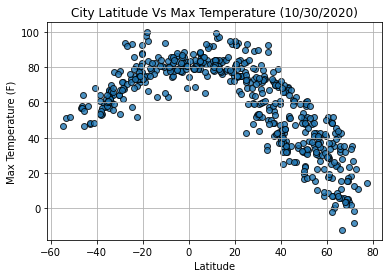

In [48]:
# Build a scatter plot for Latitude vs.Temperature in Fahrenheit
# date =pd.datetime.fromtimestamp(int(weather_data_df['Date'][0])).strftime('%m/%d/%Y')
plt.scatter(weather_data_values["Lat"], weather_data_values["Max Temp"], linewidths=1, alpha=0.8, marker="o",edgecolors='black')

# Fix in the other graph properties
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVsTemperature.png")

# Show plot
plt.show()




In this Plot - The Latitude vs. Temperature we see a decrese in temperature when the Latitide goes both north and 
south of the equator. However the decrease in temperature is higher with the temperature falling below zero(0) 
when the latitude increses over 60 or goes north.

## Latitude vs. Humidity Plot

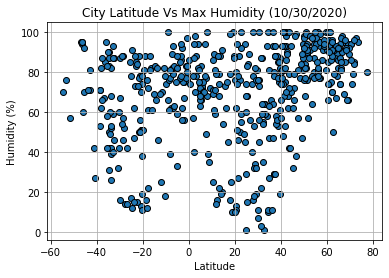

In [59]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(weather_data_values["Lat"], weather_data_values["Humidity"], marker="o",edgecolors='black')

# Fix in the other graph properties
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVsHumidity.png")

# Show plot
plt.show()




In this Plot - Latitude vs. Humidity there is more and higher humidity above 60.
In addition as the latitude goes further north humidity rises 


## Latitude vs. Cloudiness Plot

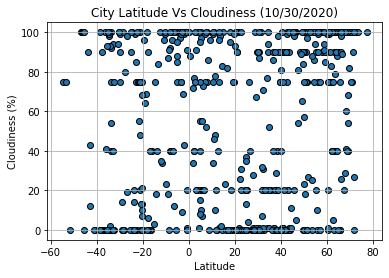

In [51]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data_values["Lat"], weather_data_values["Cloudiness"], marker="o",edgecolors='black')

# Fix in the other graph properties
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVsCloudiness.png")

# Show plot
plt.show()

In this plot - Latitude vs Cloudiness we can see a collection of points of cloudiness scattered 
all over the city for latitudes above and below zero.


## Latitude vs. Wind Speed Plot

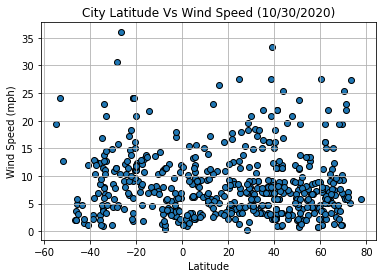

In [52]:
# Build a scatter plot for Latitude vs. Wind Speed 
plt.scatter(weather_data_values["Lat"], weather_data_values["Wind Speed"], marker="o",edgecolors='black')

# Fix in the other graph properties
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(True)

# Save the figure
plt.savefig("../Images/LatitudeVsWindSpeed.png")

# Show plot
plt.show()

In this Plot - Latitude  vs wind speed, we can see that most of the wind speed was between 0 ad 20mph 
for latitude to the north and south.

## Linear Regression

In [53]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data_values.loc[weather_data_values["Lat"] >= 0]
southern_hemisphere = weather_data_values.loc[weather_data_values["Lat"] < 0]

In [54]:
# Define function for creating linear regression and scatter plot
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"The r-squared is: {rvalue}")
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8579805806985861


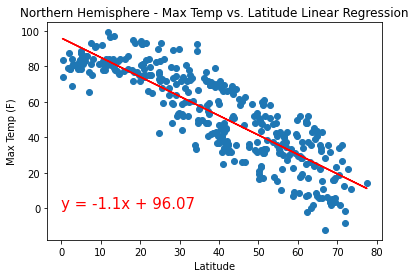

In [55]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In the Northern Hemisphere the r-squared depicts the strenghth of the correlation as a strong negative correlation between latitude and max temperature. 
This tells us that as the latitude is increasing temperature is decreasing and vice versa.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7493626875848994


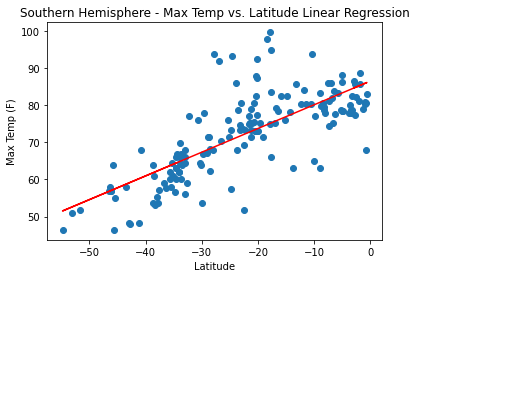

In [56]:
# Call a function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Call a function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

In the southern hemisphere the r-square depicts the strength of the correlation as a strong positive correlation between latitude and maximum temperature. 
This tells us that as the latitude is decreasing the max temperature is also decreasing and vice versa.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36986895361710853


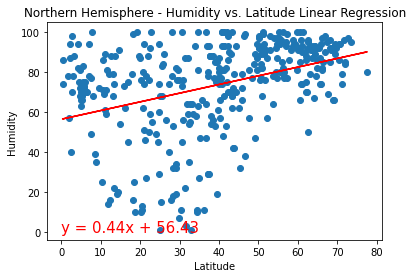

In [57]:
# Call a function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call a function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

In the Northern Hemisphere for the plot between the humidity and latitide 
the r-squared depicts the strenghth of the correlation as a weak negative correlation between latitude and humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09431175260080445


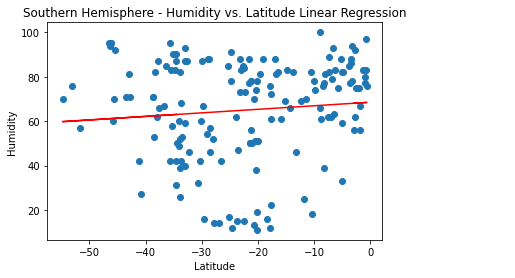

In [58]:
# Call a function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call a function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

In the southern hemisphere in the plot between humidity and latitude, 
the r-square depicts the strength of the correlation as 
a very weak positive correlation between humidity and latitude. 


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21635918352104055


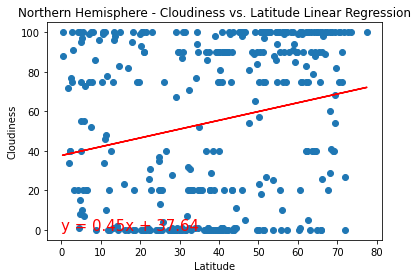

In [60]:
# Call a function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call a function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

In the Northern Hemisphere for the plot between the Cloudiness and latitide 
the r-squared depicts the strength of the correlation as a weak positive correlation between cloudiness and latitude. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1444371640106191


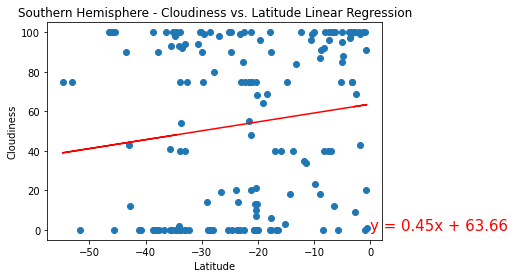

In [62]:
# Call a function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call a function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

In the southern hemisphere in the plot between humidity and latitude, 
the r-square depicts the strength of the correlation as 
a weak positive correlation between humidity and latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013997342504074918


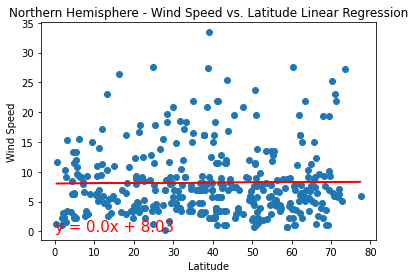

In [63]:
# Call a function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call a function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In the Northern Hemisphere for the plot between the wind speed and latitide 
the r-squared depicts the strength of the correlation as a very weak positive correlation between wind speed and latitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.08963729513133797


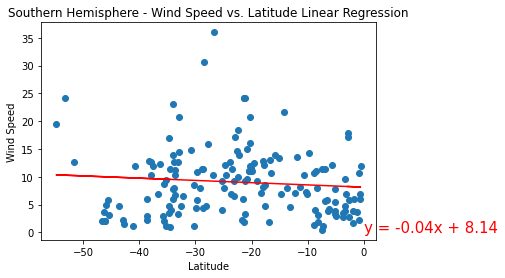

In [65]:
# Call a function #1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call a function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

In the Southern Hemisphere for the plot between the wind speed and latitide 
the r-squared depicts the strength of the correlation as a very weak negative correlation between wind speeed and latitude. 